In [4]:
import pandas as pd
import numpy as np

In [5]:
import tweepy
from tweepy import OAuthHandler
 
consumer_key = '0Ouc8jfN8Nb3AIqEXKefdWfUG'
consumer_secret = 'AZ6KA5WUsOh7kQSNvv7IdrX2wudZhVNxSXKDMTtLSbAImdzVzw'
access_token = '4721235721-JXYaEZ4xIZltEUQpT1XXN6zmnI7Afka6nkuZGm3'
access_secret = 'UMJDL63pvwIt5bj1mlDWvAmLGmhkNPLet2D6qTqbSriEm'
 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 


api = tweepy.API(auth)

In [34]:
results = []
for tweet in tweepy.Cursor(api.search, q='%23test432').items(500):
    results.append(tweet)

print type(results)
print len(results)

<type 'list'>
1


In [35]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
tweet_frame = toDataFrame(results)


In [36]:
tweet_frame[0:1]

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,751954883784241152,Great job 👎 #test432,0,0,Twitter for iPhone,2016-07-10 01:43:09,4721235721,WaldoJoe_,Waldo Joe,2016-01-07 01:48:07,,7,33,,None


In [37]:
apple = tweet_frame[0:1].to_csv("zebra1.csv", encoding='utf-8')

In [38]:
nltk_stopwords = stopwords.words("english")

print type(nltk_stopwords)
print len(nltk_stopwords)
my_stopwords = nltk_stopwords + ["br", "\r", "\n", '\r\n\r\n', "said", "000", "amto", "jdemarco", "demarco", "joe","mailto", "ambassador","ambassador hc","mo", "com","Thank", 'revenue management', 'revenue management', 'cc', 'email',
                                 "Ambassador","2015",'thank chrm','thank','chrm','director revenue','pm',"pmto", "cssgbcorporate", 
                                 'director', 'http', 'subject', 'hotel collection', 'hotel','collection', 'managementambassador',
                                 'ambassadorhc','sent','thank chrm', 'corporate', 'ambassadorhotelcollection', 'cssgb',
                                u'00', u'01', u'02', u'03', u'04', u'06', u'08', u'10', u'104', u'104 broadway', u'107', u'107 9th', u'11', u'1111', u'1111 grand', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19', '' u'20', u'2016', u'21', u'22', u'23', u'24', u'25', u'26', '________________________________From:', u'27', u'28', u'29', u'30', u'31', u'316', u'316 719', u'326', u'400', u'400 tulsa', u'405', u'64105', u'64105 jdemarco', u'64106', u'64106 816', u'67202', u'67202 316', u'67202 ambassadorhotelcollection', u'704', u'704 770', u'7134', u'7134 suite', u'719', u'719 7192', u'7192', u'7192 wichita', u'74136', u'74136 704', u'770', u'770 8118', u'8118', u'8118 107', u'8118 jdemarco', u'816', u'816 326', u'918', u'9th', u'9th kansas', u'________________________________', u'__________________________________________________', u'__________________________________________________ join', ]
print len(my_stopwords)

<type 'list'>
153
268


In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from __future__ import division
pathname = "C:\Users\joed.AMBHO\Desktop\pycourse\project\zebra1.csv"
pd.set_option('display.max_colwidth', 1500)
sentdf = pathname
sentdf = pd.read_csv(sentdf)
sentdf['newtext'] = map(lambda x: x.decode('latin-1').encode('ascii','ignore'), sentdf['tweetText'])
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


print sentdf.shape
print list(sentdf)
sentdf['newtext'] = map(lambda x: x.replace('\r\n', ''), sentdf['tweetText'])
sentdf['newtext'] = map(lambda x: x.replace('________________________________, ', ''), sentdf['tweetText'])
prelim = CountVectorizer(binary=False, lowercase = False, stop_words = 'english') 
prelim_dm = prelim.fit_transform(sentdf['newtext'])
print prelim_dm.shape
sentdf['newstext'] = sentdf['newtext'].replace('\r\n', '')
names = prelim.get_feature_names()
print type(names), len(names)

count = np.sum(prelim_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort(['count'], ascending = False).head(20)
import re
news_dict = { ' rate ':' ADR ', ' property ':' hotel ', ' RevPARs ' : ' RevPAR ', ' Brunch' : ' Breakfast ', ' Oklahoma City ' : ' OKC ', ' Kansas City ': ' KC ', ' tulak ': ' Tulsa ', ' ICTAK ': ' Wichita ', ' mciaa ': ' KC ', ' okcak ': ' OKC '}


def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

sentdf['newtext'] = map(lambda x: multiple_replace(news_dict, x), sentdf['newtext'])


(1, 17)
['Unnamed: 0', 'tweetID', 'tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userID', 'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation', 'userTimezone', 'newtext']
(1, 3)
<type 'list'> 3
<type 'list'> 3


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


# Homework 5: I will be looking at all of my sent and recieved emails

In [40]:
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open("C:\Users\joed.AMBHO\Desktop\pycourse\week5\AFINN-111.txt") ]))

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

sentdf['afinn'] = map(lambda x: afinn_sent(x), sentdf['newtext'])
sentdf['afinn'].value_counts()

Negative    1
Name: afinn, dtype: int64

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv1 = CountVectorizer(lowercase=True, 
                     stop_words='english',
                     binary=False,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words='english', 
                        ngram_range = (1,2)) 

choice = TfidfVectorizer(stop_words = 'english') 

cv_dm = cv1.fit_transform(sentdf['newtext'])
tfidf_dm = tfidf1.fit_transform(sentdf['newtext'])
choice_dm = choice.fit_transform(sentdf['newtext'])

print cv_dm.shape
print tfidf_dm.shape
print choice_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
count_df = pd.DataFrame(count, index = names, columns = ['count'])


(1, 5)
(1, 5)
(1, 3)
<type 'list'> 5


In [32]:
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open("C:\Users\joed.AMBHO\Desktop\pycourse\week5\AFINN-111.txt") ]))

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

sentdf['afinn'] = map(lambda x: afinn_sent(x), sentdf['newtext'])
sentdf['afinn'].value_counts()

Positive    1
Name: afinn, dtype: int64

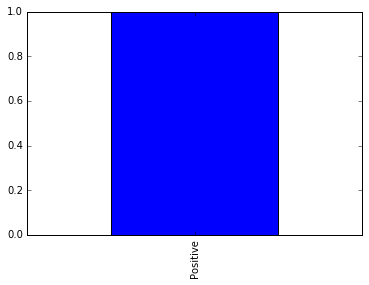

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

sentdf['afinn'].value_counts().plot(kind='bar')

# Q2: The distribution of my data set is about 3500 positive, 1000 neutral, and about 200 negative. My concern is that the amount of negative emails may be an issue. Bayes is a model that starts by calculating the prior probability of each label, which is determined by checking the frequency of each label in the training set. The decision tree model is basically a simple flowchart that selects labels for input values. This flowchart consists of decision nodes, which check feature values, and leaf nodes, which assign labels. This node contains a condition that checks one of the input value's features, and selects a branch based on that feature's value. Logistic Regression looks for the set of parameters that maximizes the total likelihood of the training corpus... My guess regarding the most accurate model is Bayes just based on the way it calculates. I wonder if it will struggle given the amount of pos/neg/neutral emails that I have. Classification is the task of choosing the correct class label for a given input. I looking at all of my sent/received emails to see if we can classify them as pos/neg/neutral and accurately predict them.


In [150]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = cv_dm.toarray() 
print type(X)


y = sentdf['afinn'].values #this is an array of labels

<type 'numpy.ndarray'>


In [151]:
print pd.DataFrame(X,columns = cv1.get_feature_names())[4:5]

   64105jdemarco  74136704  8118107  8118107 kansas  \
4              0         1        0               0   

   ________________________________from  able  access  additional  adr  also  \
4                                     0     0       0           0    0     0   

  ...   wichita  wichita autograph  wichita ks  william  william kinser  work  \
4 ...         0                  0           0        0               0     0   

   would  wrote  year  yes  
4      0      0     0    0  

[1 rows x 257 columns]


# T1: Below I set the test size 40 percent.

# T2:

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(2775L, 257L)
(1850L, 257L)
(2775L,)
(1850L,)


# T3: I have the performance metrics below each test--> my T3 is on-going.

In [153]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)


print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.86
accuracy: 0.86
             precision    recall  f1-score   support

   Negative       0.08      0.06      0.07        69
    Neutral       0.78      0.85      0.81       412
   Positive       0.91      0.90      0.91      1369

avg / total       0.85      0.86      0.86      1850



In [154]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.671351351351
accuracy: 0.671351351351
             precision    recall  f1-score   support

   Negative       0.11      0.42      0.18        69
    Neutral       0.57      0.54      0.55       412
   Positive       0.83      0.72      0.77      1369

avg / total       0.74      0.67      0.70      1850



In [155]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.885945945946
accuracy: 0.885945945946
             precision    recall  f1-score   support

   Negative       0.17      0.04      0.07        69
    Neutral       0.81      0.85      0.83       412
   Positive       0.92      0.94      0.93      1369

avg / total       0.87      0.89      0.87      1850



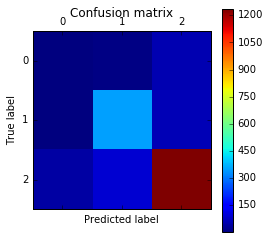

[[   4    8   57]
 [   2  350   60]
 [  43   89 1237]]


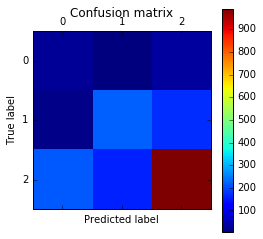

[[ 29   6  34]
 [ 15 222 175]
 [217 161 991]]


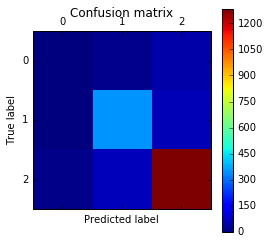

[[   3   16   50]
 [   0  351   61]
 [  15   69 1285]]


In [156]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

# Q3: I was pretty surprised at how accurate all three of the methods were. I wonder if this is because I don't use that many words so it can better predict? It could also be that I do not have enough neutrals and negatives in my distribution. Decision tree and log regression were both VERY close (86% acc vs 87%) and Bayes was 20% lower. Bayes missed the mark by 20% precision on all three classifiers. Seems odd... Bayes did more accurately predict the 'negatives' than the Decision Tree model. Log Regression missed the neutral mark entirely.

# T4:

In [157]:
raw_data = {'Model Name': ['Decision Tree 1', 'Naive Bayes 1', 'Logistic Regression 1'],
        'Processing/parameters': ['Basic Decision Tree - no weights', 'Basic Naive Bayes - no weights', "Basic Logistic Regression - no weights",],
        'Accuracy': [86.0, 67.4, 88.7]}
model_performance = pd.DataFrame(raw_data, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])
model_performance

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7


The model that performed the best was Log Regression. I am not surprised by this. This was the method I predicted that would do the best. I wonder what would happen if I added the weights...

# Added weights

In [158]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = tfidf_dm.toarray() 


y = sentdf['afinn'].values #this is an array of labels
 

In [159]:
print pd.DataFrame(X,columns = tfidf1.get_feature_names())[0:1]

   64105jdemarco  74136704  8118107  8118107 kansas  \
0            0.0       0.0      0.0             0.0   

   ________________________________from  able  access  additional  adr  also  \
0                              0.101574   0.0     0.0         0.0  0.0   0.0   

  ...   wichita  wichita autograph  wichita ks   william  william kinser  \
0 ...       0.0                0.0         0.0  0.172851        0.095426   

   work  would  wrote      year  yes  
0   0.0    0.0    0.0  0.105488  0.0  

[1 rows x 257 columns]


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) #random_state is set seed

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(2775L, 257L)
(1850L, 257L)
(2775L,)
(1850L,)


In [161]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)


print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.86972972973
accuracy: 0.86972972973
             precision    recall  f1-score   support

   Negative       0.12      0.07      0.09        69
    Neutral       0.80      0.84      0.82       412
   Positive       0.91      0.92      0.92      1369

avg / total       0.86      0.87      0.86      1850



In [162]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.825405405405
accuracy: 0.825405405405
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.81      0.50      0.62       412
   Positive       0.83      0.97      0.89      1369

avg / total       0.79      0.83      0.80      1850



In [163]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.898378378378
accuracy: 0.898378378378
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.88      0.82      0.85       412
   Positive       0.90      0.97      0.94      1369

avg / total       0.86      0.90      0.88      1850



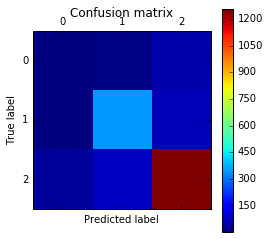

[[   5   11   53]
 [   2  346   64]
 [  35   76 1258]]


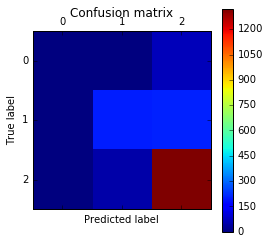

[[   0    0   69]
 [   0  205  207]
 [   0   47 1322]]


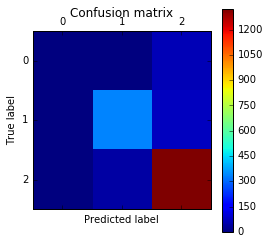

[[   0    4   65]
 [   0  337   75]
 [   0   44 1325]]


In [164]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

T5:

In [165]:
raw_data2 = {'Model Name': ['Decision Tree 2', 'Naive Bayes 2', 'Logistic Regression 2'],
        'Processing/parameters': ['Basic Decision Tree - w/weights', 'Basic Naive Bayes - w/weights', "Basic Logistic Regression - w/weights",],
        'Accuracy': [86.9, 82.5, 89.8]}
model_performance2 = pd.DataFrame(raw_data2, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])

In [166]:
frames = model_performance.append(model_performance2, ignore_index= True)
frames

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7
3,Decision Tree 2,Basic Decision Tree - w/weights,86.9
4,Naive Bayes 2,Basic Naive Bayes - w/weights,82.5
5,Logistic Regression 2,Basic Logistic Regression - w/weights,89.8


# T6, Q6-8 are on-going in bold text:  At this point I am going to play with adding more stop words and looking at accuracy. Then I am going back to the original set, and remove the n-gram range. I predict that this will improve accuracy and that Log Regression will be the most accurate but the Log regression and Bayes miss the mark on negative emails.

In [167]:
nltk_stopwords = stopwords.words("english")
r_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
               'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 
               'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
               'these','revenue' ,'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
               'having', 'do', 'does', 'did', 'doing', 'would', 'should', 'could', 'ought', "i'm", "you're", "he's",
               "she's", "it's", "we're", "they're", "i've", "you've", "we've", "they've", "i'd", "you'd", "he'd", 
               "she'd", "we'd", "they'd", "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "isn't", "aren't", 
               "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", 
               "shan't", "shouldn't", "can't", 'cannot', "couldn't", "mustn't", "let's", "that's", "who's", "what's", 
               "here's", "there's", "when's", "where's", "why's", "how's", 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
               'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
               'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
               'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 
               'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
               'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very']
print type(nltk_stopwords)
print len(nltk_stopwords)
my_stopwords = nltk_stopwords + r_stopwords + ["br", "\r", "\n", '\r\n\r\n', "said", "000", "amto", "jdemarco", "demarco", "joe","mailto", "ambassador","ambassador hc","mo", "com","Thank", 'revenue management', 'revenue management', 'cc', 'email',
                                 "Ambassador","2015",'thank chrm','thank','chrm','director revenue','pm',"pmto", "cssgbcorporate", 
                                 'director', 'http', 'subject', 'hotel collection', 'hotel','collection', 'managementambassador',
                                 'ambassadorhc','sent','thank chrm', 'corporate', 'ambassadorhotelcollection', 'cssgb',
                                u'00', u'01', u'02', u'03', u'04', u'06', u'08', u'10', u'104', u'104 broadway', u'107', u'107 9th', u'11', u'1111', u'1111 grand', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19', '' u'20', u'2016', u'21', u'22', u'23', u'24', u'25', u'26', '________________________________From:', u'27', u'28', u'29', u'30', u'31', u'316', u'316 719', u'326', u'400', u'400 tulsa', u'405', u'64105', u'64105 jdemarco', u'64106', u'64106 816', u'67202', u'67202 316', u'67202 ambassadorhotelcollection', u'704', u'704 770', u'7134', u'7134 suite', u'719', u'719 7192', u'7192', u'7192 wichita', u'74136', u'74136 704', u'770', u'770 8118', u'8118', u'8118 107', u'8118 jdemarco', u'816', u'816 326', u'918', u'9th', u'9th kansas', u'________________________________', u'__________________________________________________', u'__________________________________________________ join', ]
print len(my_stopwords)

<type 'list'>
153
443


In [168]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.95, 
                     min_df=0.05,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.95, 
                        min_df=0.05,
                        ngram_range = (1,2)) 

choice = TfidfVectorizer(stop_words = my_stopwords) 

cv_dm = cv1.fit_transform(sentdf['newtext'])
tfidf_dm = tfidf1.fit_transform(sentdf['newtext'])
choice_dm = choice.fit_transform(sentdf['newtext'])

names = cv1.get_feature_names()

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
count_df = pd.DataFrame(count, index = names, columns = ['count'])


In [169]:
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open("C:\Users\joed.AMBHO\Desktop\pycourse\week5\AFINN-111.txt") ]))

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

sentdf['afinn'] = map(lambda x: afinn_sent(x), sentdf['newtext'])
sentdf['afinn'].value_counts()

Positive    3475
Neutral     1001
Negative     149
Name: afinn, dtype: int64

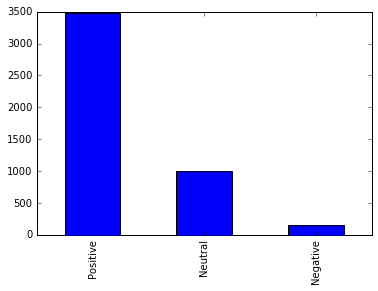

In [170]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

sentdf['afinn'].value_counts().plot(kind='bar')

In [171]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = tfidf_dm.toarray() 


y = sentdf['afinn'].values #this is an array of labels
 

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) #random_state is set seed

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(2775L, 249L)
(1850L, 249L)
(2775L,)
(1850L,)


In [173]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)


print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.868648648649
accuracy: 0.868648648649
             precision    recall  f1-score   support

   Negative       0.18      0.13      0.15        69
    Neutral       0.80      0.85      0.82       412
   Positive       0.92      0.91      0.91      1369

avg / total       0.86      0.87      0.87      1850



In [174]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.824324324324
accuracy: 0.824324324324
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.83      0.47      0.60       412
   Positive       0.82      0.97      0.89      1369

avg / total       0.79      0.82      0.79      1850



In [175]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.902702702703
accuracy: 0.902702702703
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.88      0.83      0.86       412
   Positive       0.91      0.97      0.94      1369

avg / total       0.87      0.90      0.88      1850



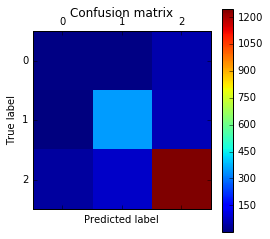

[[   9    8   52]
 [   2  349   61]
 [  40   80 1249]]


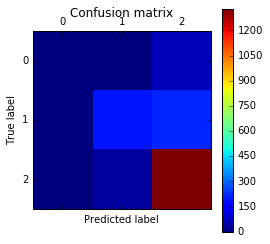

[[   0    0   69]
 [   0  195  217]
 [   0   39 1330]]


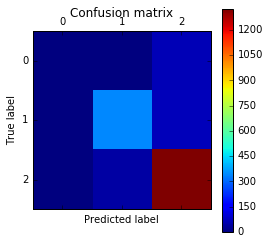

[[   0    4   65]
 [   0  344   68]
 [   0   43 1326]]


In [176]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

In [177]:
raw_data3 = {'Model Name': ['Decision Tree 3', 'Naive Bayes 3', 'Logistic Regression 3'],
        'Processing/parameters': ['Basic Decision Tree - w/weights+R_Stopwords', 'Basic Naive Bayes -  w/weights+R_Stopwords', "Basic Logistic Regression -  w/weights+R_Stopwords",],
        'Accuracy': [86.8, 82.4, 90.2]}
model_performance3 = pd.DataFrame(raw_data3, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])
frames2 = frames.append(model_performance3, ignore_index=True)
frames2

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7
3,Decision Tree 2,Basic Decision Tree - w/weights,86.9
4,Naive Bayes 2,Basic Naive Bayes - w/weights,82.5
5,Logistic Regression 2,Basic Logistic Regression - w/weights,89.8
6,Decision Tree 3,Basic Decision Tree - w/weights+R_Stopwords,86.8
7,Naive Bayes 3,Basic Naive Bayes - w/weights+R_Stopwords,82.4
8,Logistic Regression 3,Basic Logistic Regression - w/weights+R_Stopwords,90.2


# Well.. that did virtually nothing except improve my Log Regression. Probably because the stopwords lists were both so close... In fact, it decreased my accuracy by .01 on a few of them (I rounded). Maybe it created more noise for Decision tree and Bayes? I also did this without the weighting system. Exact same results. Decreased all three models by .01-.03% except for Log Reg. I was correct regarding the Log Regression prediction. Next I will be removing the n-gram setting from my original weighted set (Decision Tree 2, Log Reg 2, and Bayes 2). It will be interesting to see if accuracy is improved. My guess is that there will not be any improvement and that Log Reg is still the most accurate. The size is adjusting by 5-10 each time. This is also why the change is so small. Bayes and Log did fail on the negative emails. 

In [178]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.95, 
                     min_df=0.05) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.95, 
                        min_df=0.05) 

choice = TfidfVectorizer(stop_words = my_stopwords) 

cv_dm = cv1.fit_transform(sentdf['newtext'])
tfidf_dm = tfidf1.fit_transform(sentdf['newtext'])
choice_dm = choice.fit_transform(sentdf['newtext'])

print cv_dm.shape
print tfidf_dm.shape
print choice_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
count_df = pd.DataFrame(count, index = names, columns = ['count'])

(4625, 201)
(4625, 201)
(4625, 18572)
<type 'list'> 201


In [179]:
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open("C:\Users\joed.AMBHO\Desktop\pycourse\week5\AFINN-111.txt") ]))

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

sentdf['afinn'] = map(lambda x: afinn_sent(x), sentdf['newtext'])
sentdf['afinn'].value_counts()

Positive    3475
Neutral     1001
Negative     149
Name: afinn, dtype: int64

(2775L, 201L)
(1850L, 201L)
(2775L,)
(1850L,)
Decision Tree
0.869189189189
accuracy: 0.869189189189
             precision    recall  f1-score   support

   Negative       0.15      0.09      0.11        69
    Neutral       0.79      0.84      0.81       412
   Positive       0.92      0.92      0.92      1369

avg / total       0.86      0.87      0.86      1850

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.827027027027
accuracy: 0.827027027027
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.84      0.49      0.61       412
   Positive       0.83      0.97      0.89      1369

avg / total       0.80      0.83      0.80      1850

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.

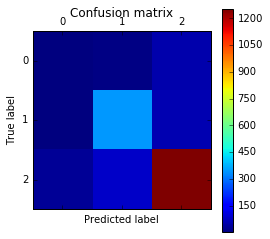

[[   6    9   54]
 [   4  347   61]
 [  30   84 1255]]


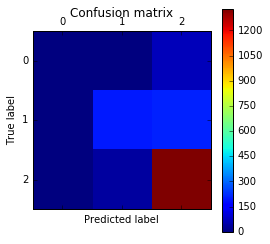

[[   0    0   69]
 [   0  200  212]
 [   0   39 1330]]


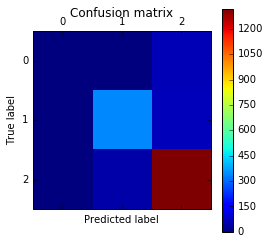

[[   0    4   65]
 [   0  341   71]
 [   0   50 1319]]


In [180]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = tfidf_dm.toarray() 


y = sentdf['afinn'].values #this is an array of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) #random_state is set seed

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)

print "Decision Tree"
print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

In [181]:
raw_data4 = {'Model Name': ['Decision Tree 4', 'Naive Bayes 4', 'Logistic Regression 4'],
        'Processing/parameters': ['Basic Decision Tree - w/weights+NO N-Grams', 'Basic Naive Bayes -  w/weights+NO N-Grams', "Basic Logistic Regression -  w/weights+NO N-Grams",],
        'Accuracy': [86.9, 82.7, 89.7]}
model_performance4 = pd.DataFrame(raw_data4, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])
frames3 = frames2.append(model_performance4, ignore_index=True)
frames3

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7
3,Decision Tree 2,Basic Decision Tree - w/weights,86.9
4,Naive Bayes 2,Basic Naive Bayes - w/weights,82.5
5,Logistic Regression 2,Basic Logistic Regression - w/weights,89.8
6,Decision Tree 3,Basic Decision Tree - w/weights+R_Stopwords,86.8
7,Naive Bayes 3,Basic Naive Bayes - w/weights+R_Stopwords,82.4
8,Logistic Regression 3,Basic Logistic Regression - w/weights+R_Stopwords,90.2
9,Decision Tree 4,Basic Decision Tree - w/weights+NO N-Grams,86.9


# As predicted, Log Reg 4 was still the most accurate. Very little changes between the "Model_2s" and the "model_4s". Bayes improved by .2 and Logs accuracy decreased by .1  .  Extra Credit: Finally I am going to adjust my min/max_df. I will predict that there will be very little change and Log Reg is still the way to go. If there is any change, since I am decreasing my min and max, I would expect the accuracy of the models to slightly improve because the overall words would decrease. It all three models completely failed on the negative emails.

(4625, 1597)
(4625, 1597)
(4625, 18572)
<type 'list'> 1597
0.897297297297
accuracy: 0.897297297297
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.86      0.83      0.85       412
   Positive       0.91      0.96      0.93      1369

avg / total       0.86      0.90      0.88      1850

(2775L, 1597L)
(1850L, 1597L)
(2775L,)
(1850L,)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Decision Tree
0.870810810811
accuracy: 0.870810810811
             precision    recall  f1-score   support

   Negative       0.12      0.10      0.11        69
    Neutral       0.84      0.84      0.84       412
   Positive       0.91      0.92      0.92      1369

avg / total       0.87      0.87      0.87      1850

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.82972972973
accuracy: 0.82972972973
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.84      0.58      0.69       412
   Positive       0.84      0.95      0.89      1369

avg / total       0.81      0.83      0.81      1850

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.900540540541
accuracy: 0.900540540541
          

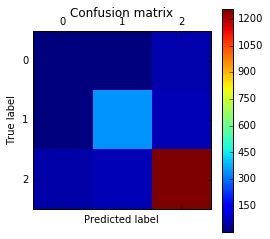

[[   7    6   56]
 [   3  346   63]
 [  49   62 1258]]


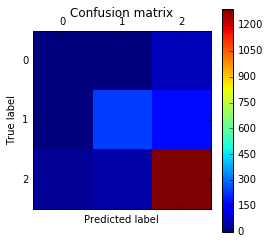

[[   0    0   69]
 [   0  239  173]
 [  27   46 1296]]


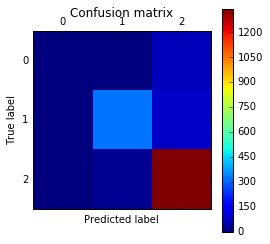

[[   0    0   69]
 [   0  323   89]
 [   0   26 1343]]


In [182]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.90, 
                     min_df=0.01,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.90, 
                        min_df=0.01,
                        ngram_range = (1,2)) 

choice = TfidfVectorizer(stop_words = my_stopwords) 

cv_dm = cv1.fit_transform(sentdf['newtext'])
tfidf_dm = tfidf1.fit_transform(sentdf['newtext'])
choice_dm = choice.fit_transform(sentdf['newtext'])

print cv_dm.shape
print tfidf_dm.shape
print choice_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort(['count'], ascending = False)

clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

# Logistic Regression
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = tfidf_dm.toarray() 


y = sentdf['afinn'].values #this is an array of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) #random_state is set seed

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)

print "Decision Tree"
print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

In [183]:
raw_data5 = {'Model Name': ['Decision Tree 5', 'Naive Bayes 5', 'Logistic Regression 5'],
        'Processing/parameters': ['Basic Decision Tree - w/weights+decreased Min&Max DF', 'Basic Naive Bayes -  w/weights+decreased Min&Max DF', "Basic Logistic Regression -  w/weights+decreased Min&Max DF",],
        'Accuracy': [87.0, 82.9, 90.0]}
model_performance5 = pd.DataFrame(raw_data5, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])
frames4 = frames3.append(model_performance5, ignore_index=True)
frames4

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7
3,Decision Tree 2,Basic Decision Tree - w/weights,86.9
4,Naive Bayes 2,Basic Naive Bayes - w/weights,82.5
5,Logistic Regression 2,Basic Logistic Regression - w/weights,89.8
6,Decision Tree 3,Basic Decision Tree - w/weights+R_Stopwords,86.8
7,Naive Bayes 3,Basic Naive Bayes - w/weights+R_Stopwords,82.4
8,Logistic Regression 3,Basic Logistic Regression - w/weights+R_Stopwords,90.2
9,Decision Tree 4,Basic Decision Tree - w/weights+NO N-Grams,86.9


# Looking at Models_5 vs Models_2, because I adjusted my min and max_df down, the accuracy did increase by .1 to .2. This is probably due to the over size of everything it has to compute being smaller. My last test will be to completely remove the min/max_df settings. I would expect the accuracy to decrease and the Log Reg to be the best fit... It completely failed on the negative predictions.

(4625, 136038)
(4625, 136038)
(4625, 18572)
<type 'list'> 136038


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0.900540540541
accuracy: 0.900540540541
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.93      0.78      0.85       412
   Positive       0.89      0.98      0.94      1369

avg / total       0.87      0.90      0.88      1850

(2775L, 136038L)
(1850L, 136038L)
(2775L,)
(1850L,)
Decision Tree
0.881621621622
accuracy: 0.881621621622
             precision    recall  f1-score   support

   Negative       0.24      0.13      0.17        69
    Neutral       0.80      0.86      0.83       412
   Positive       0.93      0.93      0.93      1369

avg / total       0.87      0.88      0.88      1850

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.831891891892
accuracy: 0.831891891892
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        69
    Neutral       0.97      0.42      0.59       412
   Positive       0.82      1.00      0.90      1369

avg /

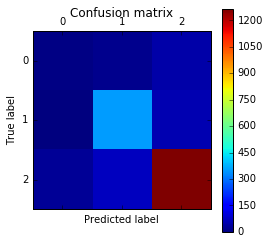

[[   9   15   45]
 [   0  355   57]
 [  28   74 1267]]


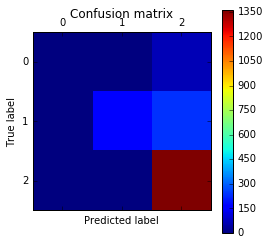

[[   0    0   69]
 [   0  175  237]
 [   0    5 1364]]


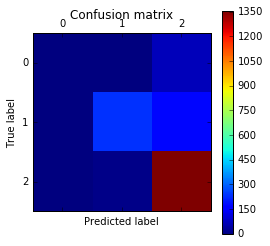

[[   0    0   69]
 [   0  237  175]
 [   0   12 1357]]


In [184]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords,
                        ngram_range = (1,2)) 

choice = TfidfVectorizer(stop_words = my_stopwords) 

cv_dm = cv1.fit_transform(sentdf['newtext'])
tfidf_dm = tfidf1.fit_transform(sentdf['newtext'])
choice_dm = choice.fit_transform(sentdf['newtext'])

print cv_dm.shape
print tfidf_dm.shape
print choice_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort(['count'], ascending = False)

clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

# Logistic Regression
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = tfidf_dm.toarray() 


y = sentdf['afinn'].values #this is an array of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) #random_state is set seed

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)# make predictions


print "Decision Tree"
print model.score(X_test,y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print model
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print model
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print model.score(X_test, y_test)

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

In [185]:
raw_data6 = {'Model Name': ['Decision Tree 6', 'Naive Bayes 6', 'Logistic Regression 6'],
        'Processing/parameters': ['Basic Decision Tree - w/weights+ NO Min&Max DF', 'Basic Naive Bayes -  w/weights+ No Min&Max DF', "Basic Logistic Regression -  w/weights+No Min&Max DF",],
        'Accuracy': [88.1, 83.1, 86.1]}
model_performance6 = pd.DataFrame(raw_data6, columns = ['Model Name', 'Processing/parameters', 'Accuracy',])
frames5 = frames4.append(model_performance6, ignore_index=True)
frames5

,Model Name,Processing/parameters,Accuracy
0,Decision Tree 1,Basic Decision Tree - no weights,86.0
1,Naive Bayes 1,Basic Naive Bayes - no weights,67.4
2,Logistic Regression 1,Basic Logistic Regression - no weights,88.7
3,Decision Tree 2,Basic Decision Tree - w/weights,86.9
4,Naive Bayes 2,Basic Naive Bayes - w/weights,82.5
5,Logistic Regression 2,Basic Logistic Regression - w/weights,89.8
6,Decision Tree 3,Basic Decision Tree - w/weights+R_Stopwords,86.8
7,Naive Bayes 3,Basic Naive Bayes - w/weights+R_Stopwords,82.4
8,Logistic Regression 3,Basic Logistic Regression - w/weights+R_Stopwords,90.2
9,Decision Tree 4,Basic Decision Tree - w/weights+NO N-Grams,86.9


# Now looking at Models_2 vs Models_6, I am confused... The Bayes increased by .5% and the Decision tree is now the most accurate. Decision tree increased to 88.1%. Log Reg DECREASED by almost 4%. I wonder if it is because there are more words to predict the positive and neutral emails. It did totally fail on negative emails. I need more negative emails. Overall, I believe the best method to use is still Log Regression with weights and min/max's and n-grams if we are looking for overall accuracy. However, if we are looking for a model that can pick up on all 3 classifiers, the Decision Tree_2 with weights, no Min/max_df is the best. I am leaning with the Decision Tree_2. One also has to wonder when overfitting comes into play.